In [1]:
# 필요한 패키지들
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from scipy.stats import norm, t
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from scipy.linalg import sqrtm
import pandas as pd
import statsmodels.api as sm

# 파이썬 기초

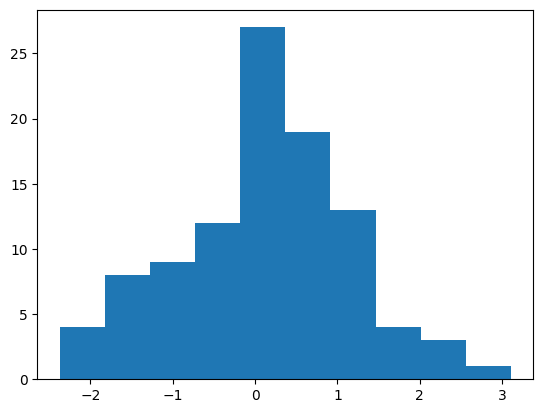

In [2]:
x = np.random.normal(size=100)
plt.hist(x)
plt.show()

In [3]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)
z = norm.pdf(x) * norm.pdf(y)
g = 'red'

In [4]:
d1 = pd.DataFrame({'x': x, 'y': y, 'z': z, 'g': g})
d2 = d1.copy()
d2['x'] = d1['x'] + 0.9
d2['y'] = d1['y'] + 0.9
d2['g'] = 'blue'

In [5]:
d2 = pd.concat([d1, d2])
ddd = 1.2

# 다변량 정규분포

다변량 정규분포는 다음과 같이 정의한다:  
* 평균 벡터 $\mu$ : 각 변수의 평균을 요소로 하는 벡터이다.
* 공분산 행렬 $\Sigma$ : 변수들 간의 공분산을 요소로 하는 대칭 행렬이다.
* 이 행렬은 양의 준정부호(positive semi-definite)여야 한다.

확률변수 $X$가 $n$차원 다변량 정규분포를 따른다면, 이를 다음과 같이 표현할 수 있다:

$$ X \sim \mathcal{N}(\mu, \Sigma)$$

여기서 $X$는 $n$차원 벡터이다.

## 확률밀도함수

다변량 정규분포의 확률밀도함수는 다음 공식에 의해 주어진다:

$$ f(x) = \frac{1}{\sqrt{(2\pi)^n |\Sigma|}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right)$$


* $x$는 $n$차원의 벡터입니다.
* $|\Sigma|$는 공분산 행렬 $\Sigma$의 행렬식입니다.
* $\Sigma^{-1}$은 $\Sigma$의 역행렬입니다.

## 특징
1. 역행렬과 행렬식: 공분산 행렬 $\Sigma$는 역행렬이 존재해야 하며, 이는 $\Sigma$가 역행렬 가능(invertible)하고 양의 정부호(positive definite)임을 의미합니다.
2. 상관관계: 변수들 간의 상관관계는 공분산 행렬을 통해 나타납니다. 행렬의 대각선 원소가 각 변수의 분산을, 비대각선 원소가 공분산을 나타냅니다.
3. 확장성: 이 분포는 다차원으로 확장이 가능하여, 복잡한 자연 현상이나 금융 모델 등에 적용될 수 있습니다.

## 예제
$n = 2, \mu = \begin{bmatrix} 0 \\ 0 \end{bmatrix} ,  \Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}$인 2차원 다변량 정규분포의 경우, 두 변수는 평균이 0이고, 분산이 1이며, 상관계수가 0.5입니다.


## 3D 그래픽

In [6]:
fig1 = go.Figure(data=[go.Scatter3d(x=d1['x'], y=d1['y'], z=d1['z'], mode='markers', marker=dict(size=1))])
fig1.update_layout(scene_camera=dict(eye=dict(x=0/ddd, y=-.01/ddd, z=1.5/ddd)))
fig1.show()

In [7]:
fig2 = go.Figure(data=[go.Scatter3d(x=d2['x'], y=d2['y'], z=d2['z'], mode='markers', marker=dict(size=1))])
fig2.update_layout(scene_camera=dict(eye=dict(x=1/ddd, y=1.1/ddd, z=.6/ddd)))
fig2.show()

In [8]:
fig3 = go.Figure(data=[go.Scatter3d(x=d2['x'], y=d2['y'], z=d2['z'], mode='markers', marker=dict(size=1, color=d2['g']))])
fig3.update_layout(scene_camera=dict(eye=dict(x=1/ddd, y=-1.1/ddd, z=.6/ddd)))
fig3.show()

# 시뮬레이션

## 시뮬레이션 (1)
패키지 없이 이변량 데이터 만들어보기

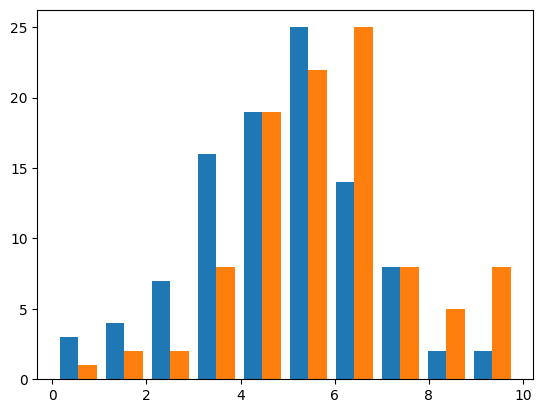

In [9]:
x = np.random.normal(loc=5, scale=2, size=100)
y = np.random.normal(loc=6, scale=2 * np.sqrt(0.91), size=100) + 0.3 * (x - 5)
w = np.column_stack((x, y))
plt.hist(w)
plt.show()

## 시뮬레이션 (2)
t분포 기반 데이터 시뮬레이션

In [10]:
n = 1000
np.random.seed(23)
x = np.random.standard_t(df=10, size=n)

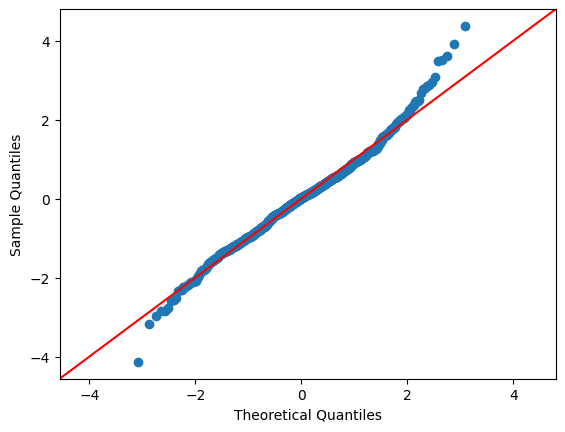

In [11]:
## t분포 확인작업
qqplot(x, dist=norm, line='45', fit=True)
plt.show()

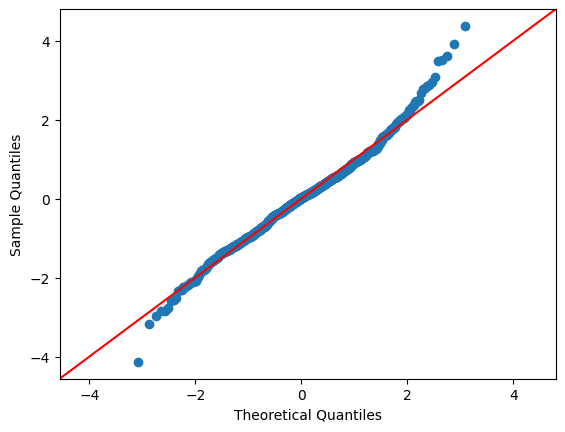

In [17]:
## 정규분포 확인작업
qqplot(x, dist=norm, line='45', fit=True)
plt.show()

## 시뮬레이션 (3)
중심행렬 만들기

In [13]:
## 중심행렬 제작
D = np.diag([1, 2, 0.4])
data = np.array([1, 0.6, 0.1, 0.6, 1, 0.2, 0.1, 0.2, 1])
rr = data.reshape((3, 3))
Sigma = sqrtm(D) @ rr @ sqrtm(D)
mu = np.zeros(3)
n = 1000

In [14]:
## 다변량자료 제작
d1 = np.random.multivariate_normal(mu, Sigma, n)

In [26]:
## 출력용 함수 제작
def qq_total(x, subplot_idx):
    sm.qqplot(x, line='45')
    plt.title(f'Q-Q Plot for Component {subplot_idx + 1}')

<Figure size 1500x500 with 0 Axes>

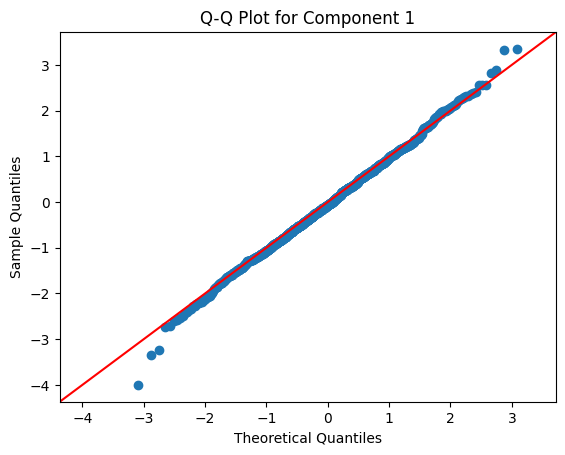

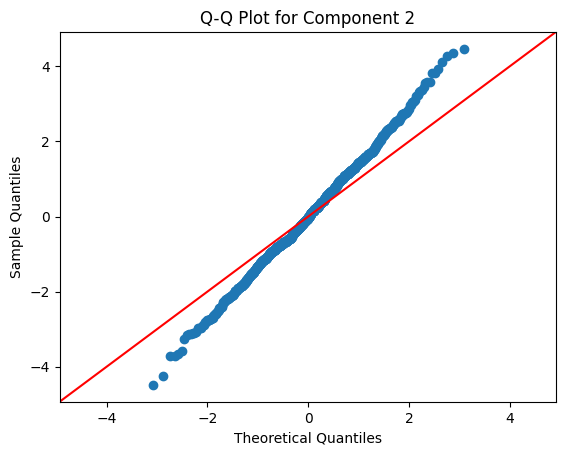

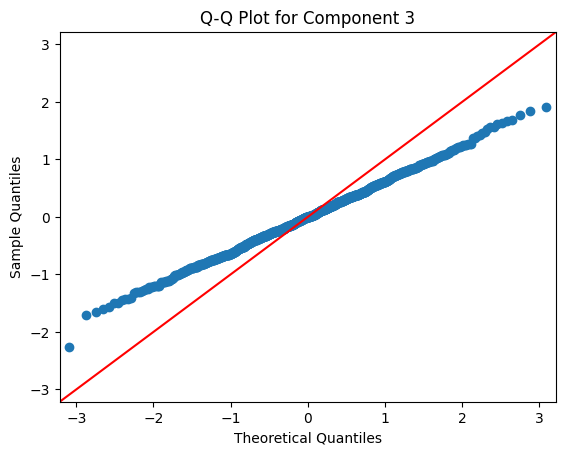

In [27]:
## 그림 출력
plt.figure(figsize=(15, 5))
for i in range(3):
    qq_total(d1[:, i], i)
plt.show()

In [16]:
## 표준화하기
d2 = (d1 - d1.mean(axis=0)) / d1.std(axis=0)

df1 = pd.DataFrame(d1, columns=['X1', 'X2', 'X3'])
df2 = pd.DataFrame(d2, columns=['X1', 'X2', 'X3'])

print(df1.head())
print(df2.head())

         X1        X2        X3
0 -0.195611  1.503006 -0.281103
1  0.394601  1.802856 -0.269545
2  0.673144 -0.951019  0.641666
3  2.069970  1.498258  1.042659
4 -2.203975 -1.481750 -1.313949
         X1        X2        X3
0 -0.147604  1.053900 -0.466240
1  0.431425  1.267165 -0.447366
2  0.704690 -0.691502  1.040650
3  2.075052  1.050523  1.695475
4 -2.117917 -1.068980 -2.152887
